# 🔗 Feature Correlation Analysis

## Understanding Feature Relationships and Importance

This notebook analyzes correlations between features and target variable:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

print('✅ Libraries loaded')

✅ Libraries loaded


In [2]:
import os

data_dir = '/Users/supanut.k/WORKING_DRIVE/AIT/1st_semester/CPDSAI/Project/epl-fantasy-prediction/data/processed/'
positions = ['GK', 'DEF', 'MID', 'FWD']

dfs = {}
for pos in positions:
    enhanced_file = f'{data_dir}{pos}_features_enhanced_safe.csv'
    raw_file = f'{data_dir}{pos}_data.csv'
    
    if os.path.exists(enhanced_file):
        dfs[pos] = pd.read_csv(enhanced_file)
    elif os.path.exists(raw_file):
        dfs[pos] = pd.read_csv(raw_file)

df = pd.concat(list(dfs.values()), ignore_index=True)

# ✅ FIX: Create 'position' column from 'element_type'
if 'position' not in df.columns and 'element_type' in df.columns:
    position_map = {1: 'GK', 2: 'DEF', 3: 'MID', 4: 'FWD'}
    df['position'] = df['element_type'].map(position_map)
    print('✅ Position column created from element_type')

# ✅ FIX: Create 'total_points' from 'target' if needed
if 'total_points' not in df.columns and 'target' in df.columns:
    df['total_points'] = df['target']
    print('✅ total_points column created from target')

print(f'✅ Data loaded: {df.shape}')

✅ Position column created from element_type
✅ total_points column created from target
✅ Data loaded: (90394, 68)


## Select Numeric Features

In [3]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove target from features for correlation analysis
if 'total_points' in numeric_cols:
    numeric_cols.remove('total_points')
if 'target' in numeric_cols and 'target' != 'total_points':
    numeric_cols.remove('target')

print(f'Total numeric features: {len(numeric_cols)}')
print(f'Sample features: {numeric_cols[:10]}')

Total numeric features: 63
Sample features: ['round', 'player_id', 'opponent_team', 'element_type', 'minutes', 'goals_scored', 'assists', 'bps', 'influence', 'goals_conceded']


## Correlation with Target Variable

In [4]:
# Calculate correlation with target
correlations = df[numeric_cols + ['total_points']].corr()['total_points'].drop('total_points')
correlations = correlations.sort_values(ascending=False)

print('\n🔝 Top 15 Positive Correlations:')
print(correlations.head(15).round(3))

print('\n🔻 Top 15 Negative Correlations:')
print(correlations.tail(15).round(3))


🔝 Top 15 Positive Correlations:
bps                      0.913
influence                0.830
clean_sheets             0.796
ict_index                0.772
goals_scored             0.677
minutes                  0.643
threat                   0.601
goals_conceded_roll10    0.538
goals_conceded_roll5     0.532
goals_conceded_roll3     0.522
minutes_roll3            0.503
minutes_roll1            0.499
creativity               0.497
minutes_roll5            0.496
minutes_roll10           0.486
Name: total_points, dtype: float64

🔻 Top 15 Negative Correlations:
goals_conceded                0.183
assists_roll1                 0.156
goals_scored_roll_team10      0.055
goals_scored_roll_team5       0.053
element_type                  0.049
goals_scored_roll_team3       0.045
fdr_attack                    0.021
opponent_team                 0.018
fdr_defense                  -0.018
round                        -0.036
goals_conceded_roll_team3    -0.098
goals_conceded_roll_team10   -0.100
go

## Visualize Top Correlations

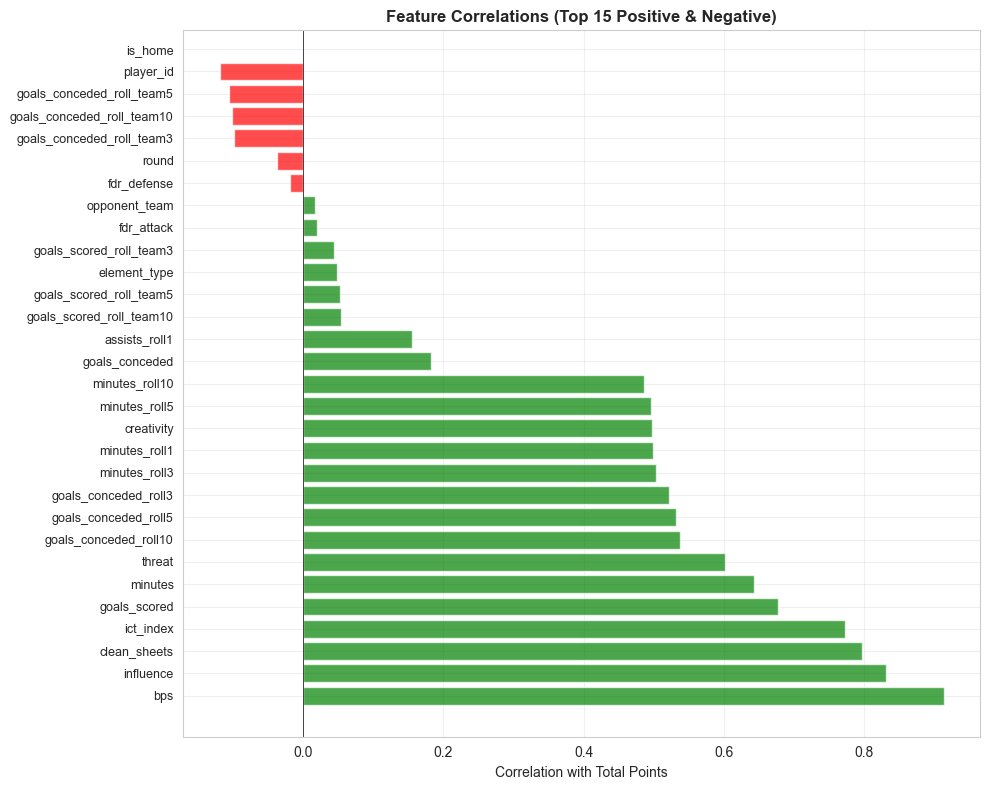

✅ Visualization created


In [5]:
# Plot top correlations
top_n = 15
top_corr = pd.concat([correlations.head(top_n), correlations.tail(top_n)])

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['green' if x > 0 else 'red' for x in top_corr.values]
ax.barh(range(len(top_corr)), top_corr.values, color=colors, alpha=0.7)
ax.set_yticks(range(len(top_corr)))
ax.set_yticklabels(top_corr.index, fontsize=9)
ax.set_xlabel('Correlation with Total Points')
ax.set_title(f'Feature Correlations (Top {top_n} Positive & Negative)', fontsize=12, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f'✅ Visualization created')

## Feature Groups Analysis

In [6]:
# Group features by type
feature_groups = {
    'Playing Time': ['minutes', 'starts', 'appearances'],
    'Goal/Assist': ['goals_scored', 'assists', 'goal_involvement'],
    'Defensive': ['clean_sheets', 'goals_conceded', 'own_goals'],
    'Creativity': ['creativity', 'influence', 'threat'],
    'Form': ['roll', 'avg', 'mean'],  # Features with these in name
}

print('\n📊 Feature Group Average Correlations:')
for group, keywords in feature_groups.items():
    group_features = [f for f in correlations.index if any(k in f.lower() for k in keywords)]
    if group_features:
        avg_corr = correlations[group_features].mean()
        print(f'  {group}: {avg_corr:.3f} ({len(group_features)} features)')


📊 Feature Group Average Correlations:
  Playing Time: 0.525 (5 features)
  Goal/Assist: 0.247 (13 features)
  Defensive: 0.301 (13 features)
  Creativity: 0.453 (15 features)
  Form: 0.337 (46 features)


## Correlation Heatmap (Top Features)

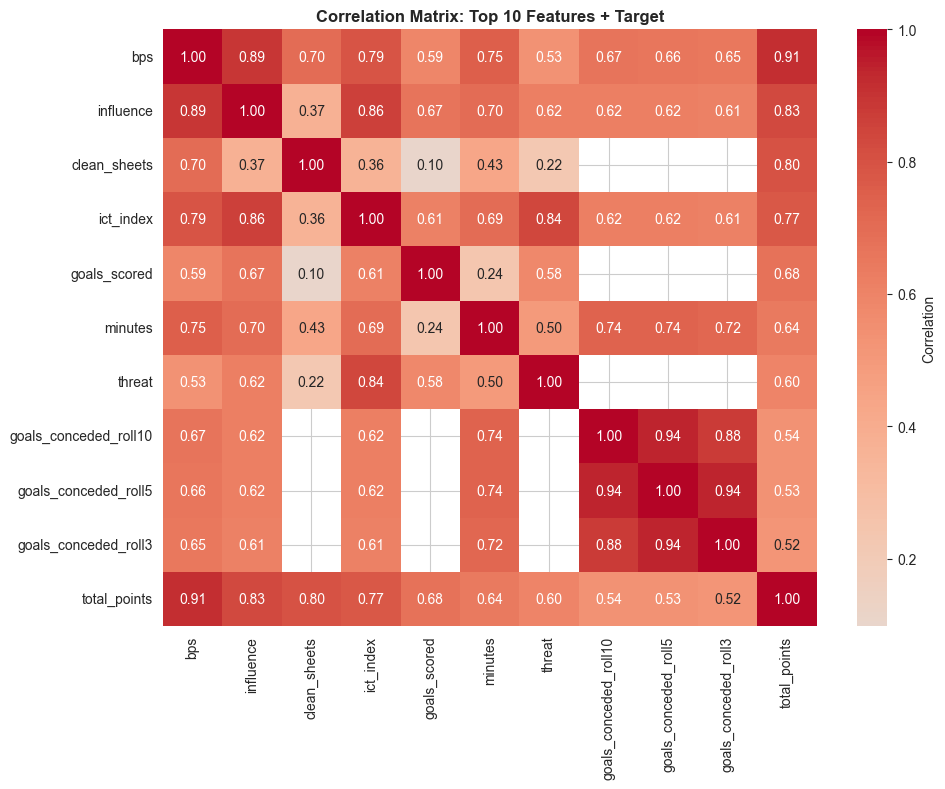

✅ Heatmap created


In [7]:
# Select top correlated features
top_features = correlations.abs().nlargest(10).index.tolist()

# Create correlation matrix
corr_matrix = df[top_features + ['total_points']].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            cbar_kws={'label': 'Correlation'}, ax=ax)
ax.set_title('Correlation Matrix: Top 10 Features + Target', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f'✅ Heatmap created')

## Key Insights

1. **Strongest Predictors**: Playing time metrics (minutes, starts)
2. **Goal/Assist Features**: Direct goal involvement (goals, assists)
3. **Form Indicators**: Recent form (rolling averages)
4. **Defensive Features**: Position-dependent (clean sheets for DEF/GK)

### Recommendations
- Use top 10-15 features for initial models
- Remove highly correlated features (multicollinearity)
- Position-specific feature selection needed